In [2]:
#improt the important library we will use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# 1.0 Goal:
>Predict how a facility’s performance on various healthcare measures compares to the national average (i.e., “No Different,” “Better,” or “Worse”). This can help healthcare administrators identify areas of improvement or excellence.

# 1.1 about data 
https://data.cms.gov/provider-data/dataset/ynj2-r877#data-table
>> * '`Facility ID`': A unique identifier assigned to each facility.
> * '`Facility Name`': The official name of the facility.
> * '`Address`': The street address where the facility is located.
> * '`City/Town`': The city or town of the facility.
> * '`State`': The state abbreviation where the facility is situated.
> * '`ZIP Code`': The postal code for the facility’s location.
> * '`County/Parish`': The county or parish where the facility is located.
> * '`Telephone Number`': The primary contact number for the facility.
> * '`Measure ID`': A unique code for each performance measure.
> * '`Measure Name`':A brief description of the measure being reported.
> * '`Compared to National`': An indication of how the facility's performance compares with the national average. 
> * '`Denominator`': The number of cases or patients that form the base for calculating the measure.
> * '`Score`': he actual numeric value or rate for the performance measure.
> * '`Lower Estimate`': The lower bound of the confidence interval for the score.
> * '`Higher Estimate`': The upper bound of the confidence interval.
> * '`Footnote`': Any additional notes or clarifications related to the measure.
> * '`Start Date`': The beginning date of the period during which data was collected.
> * '`End Date`': The ending date of the data collection period.

In [3]:
# read dataset 
df=pd.read_csv('Complications_and_Deaths-Hospital.csv')

# 1.2 📊 Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90611 entries, 0 to 90610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Facility ID           90611 non-null  object
 1   Facility Name         90611 non-null  object
 2   Address               90611 non-null  object
 3   City/Town             90611 non-null  object
 4   State                 90611 non-null  object
 5   ZIP Code              90611 non-null  int64 
 6   County/Parish         90611 non-null  object
 7   Telephone Number      90611 non-null  object
 8   Measure ID            90611 non-null  object
 9   Measure Name          90611 non-null  object
 10  Compared to National  90611 non-null  object
 11  Denominator           90611 non-null  object
 12  Score                 90611 non-null  object
 13  Lower Estimate        90611 non-null  object
 14  Higher Estimate       90611 non-null  object
 15  Footnote              42254 non-null

In [5]:
df.isnull().sum()

Facility ID                 0
Facility Name               0
Address                     0
City/Town                   0
State                       0
ZIP Code                    0
County/Parish               0
Telephone Number            0
Measure ID                  0
Measure Name                0
Compared to National        0
Denominator                 0
Score                       0
Lower Estimate              0
Higher Estimate             0
Footnote                48357
Start Date                  0
End Date                    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

from this the Footnote we will drop it beacuse all values contains is null value 

In [7]:
df.drop(["Footnote"],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90611 entries, 0 to 90610
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Facility ID           90611 non-null  object
 1   Facility Name         90611 non-null  object
 2   Address               90611 non-null  object
 3   City/Town             90611 non-null  object
 4   State                 90611 non-null  object
 5   ZIP Code              90611 non-null  int64 
 6   County/Parish         90611 non-null  object
 7   Telephone Number      90611 non-null  object
 8   Measure ID            90611 non-null  object
 9   Measure Name          90611 non-null  object
 10  Compared to National  90611 non-null  object
 11  Denominator           90611 non-null  object
 12  Score                 90611 non-null  object
 13  Lower Estimate        90611 non-null  object
 14  Higher Estimate       90611 non-null  object
 15  Start Date            90611 non-null

In [9]:
df.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Start Date,End Date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,32,3,1.6,5.5,07/01/2020,03/31/2023
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,291,10.8,8.4,13.6,07/01/2020,06/30/2023
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,157,3.8,2.1,6.8,07/01/2020,06/30/2023
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,122,7.9,5.2,11.9,07/01/2020,06/30/2023
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,610,10.5,8.6,12.9,07/01/2020,06/30/2023


we will change types of these columns  Denominator,Score,Lower Estimate,Higher Estimate	from object type to numerical type to can draw the graphs.

In [10]:
# Now apply your conversion dictionary
convert_dict = {'Denominator': int, 'Score': float, 'Lower Estimate': float, 'Higher Estimate': float}
df = df.astype(convert_dict)

# Check the DataFrame info to confirm changes
df.info()


ValueError: invalid literal for int() with base 10: 'Not Applicable': Error while type casting for column 'Denominator'

why this error because there value in column Denominator with value Not Applicable and this will give me any value because that we will remove it 

In [11]:
# Remove rows where Denominator is either "Not Applicable" or "Not Available"
df = df[~df['Denominator'].isin(["Not Applicable", "Not Available"])]
# Now apply your conversion dictionary
convert_dict = {'Denominator': int, 'Score': float, 'Lower Estimate': float, 'Higher Estimate': float}
df = df.astype(convert_dict)

# Check the DataFrame info to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45879 entries, 0 to 90578
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Facility ID           45879 non-null  object 
 1   Facility Name         45879 non-null  object 
 2   Address               45879 non-null  object 
 3   City/Town             45879 non-null  object 
 4   State                 45879 non-null  object 
 5   ZIP Code              45879 non-null  int64  
 6   County/Parish         45879 non-null  object 
 7   Telephone Number      45879 non-null  object 
 8   Measure ID            45879 non-null  object 
 9   Measure Name          45879 non-null  object 
 10  Compared to National  45879 non-null  object 
 11  Denominator           45879 non-null  int64  
 12  Score                 45879 non-null  float64
 13  Lower Estimate        45879 non-null  float64
 14  Higher Estimate       45879 non-null  float64
 15  Start Date            45

as you see the entries get less than before around hlaf but know we can use it to draw graphs and build model. 

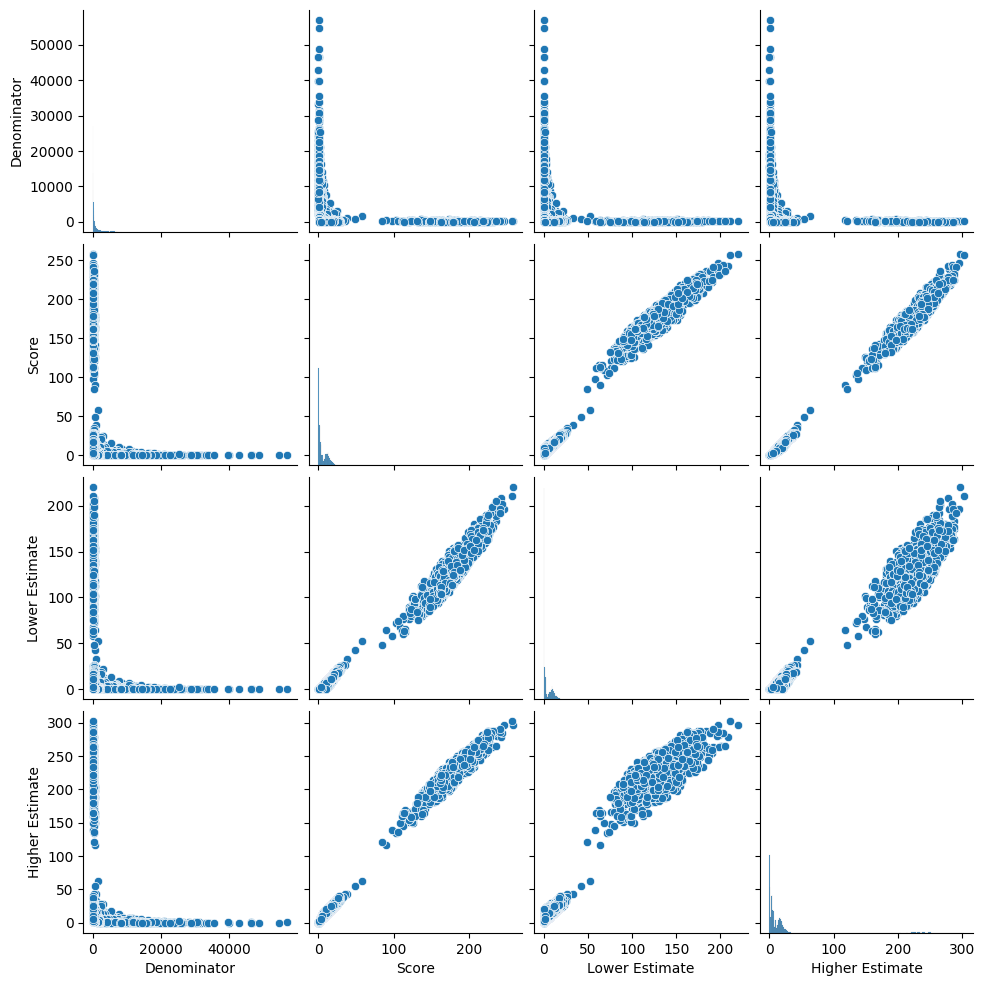

In [12]:
df_show=df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']]
sns.pairplot(df_show)
plt.show()

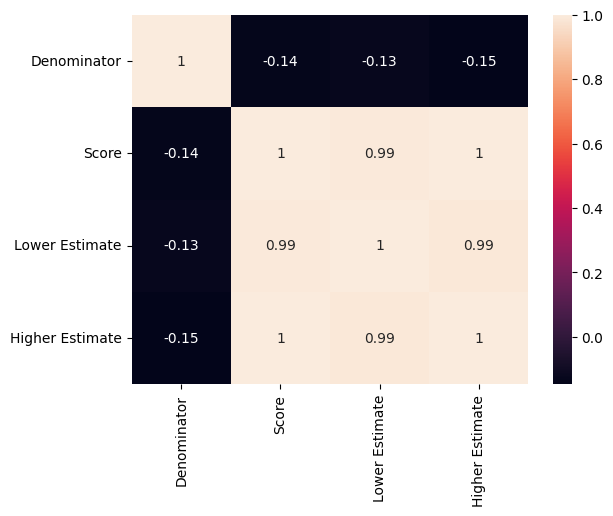

In [13]:
sns.heatmap(df_show.corr(numeric_only=True),annot=True)
plt.show()

C:\Users\Mua\AppData\Local\Temp\ipykernel_12332\1854354353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')


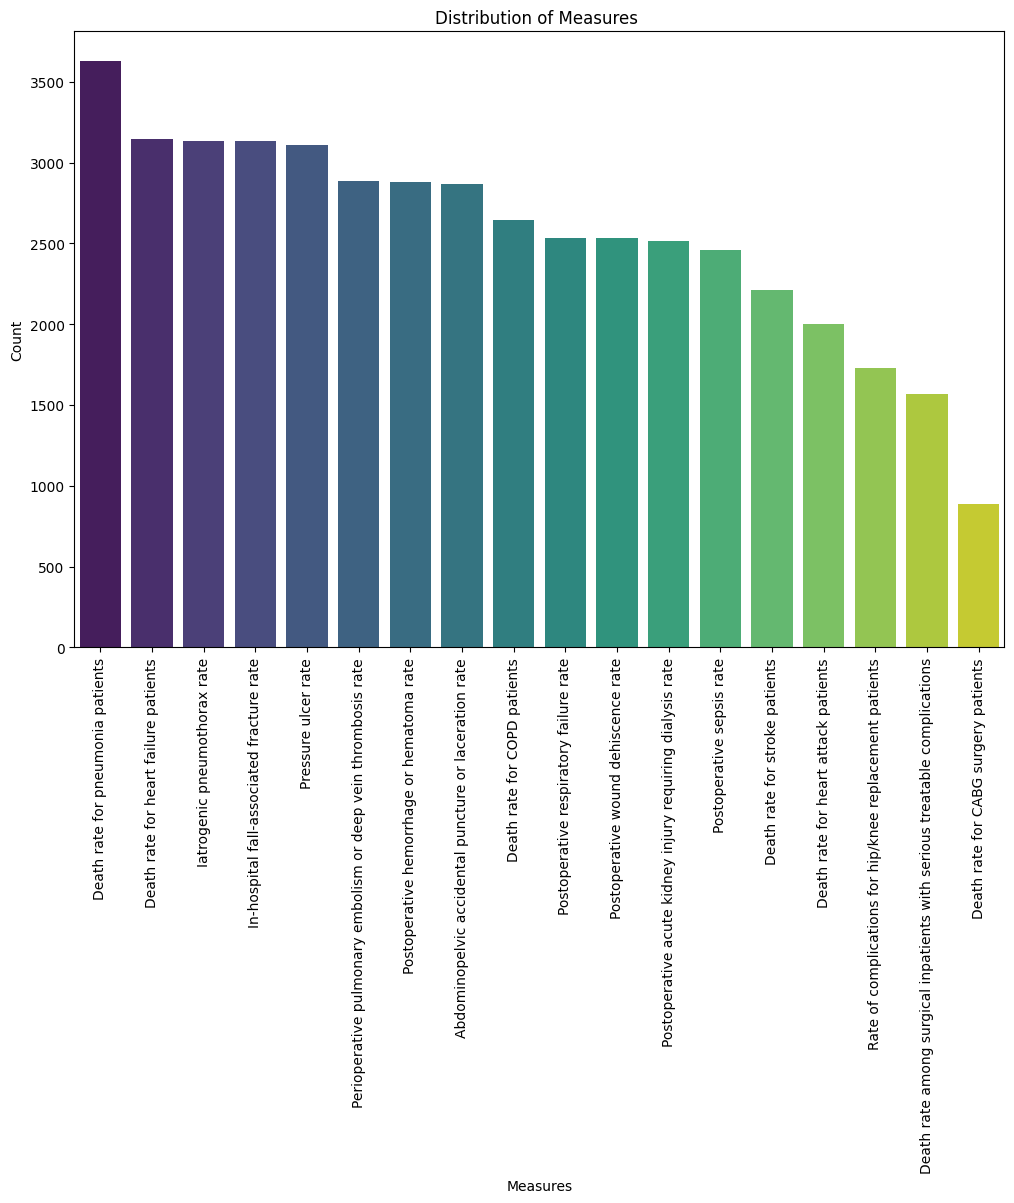

In [14]:

plt.figure(figsize=(12, 8))
brand_counts=df["Measure Name"].value_counts()
sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Measures ')
plt.xlabel('Measures')
plt.ylabel('Count')
plt.show()

C:\Users\Mua\AppData\Local\Temp\ipykernel_12332\3733548557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')


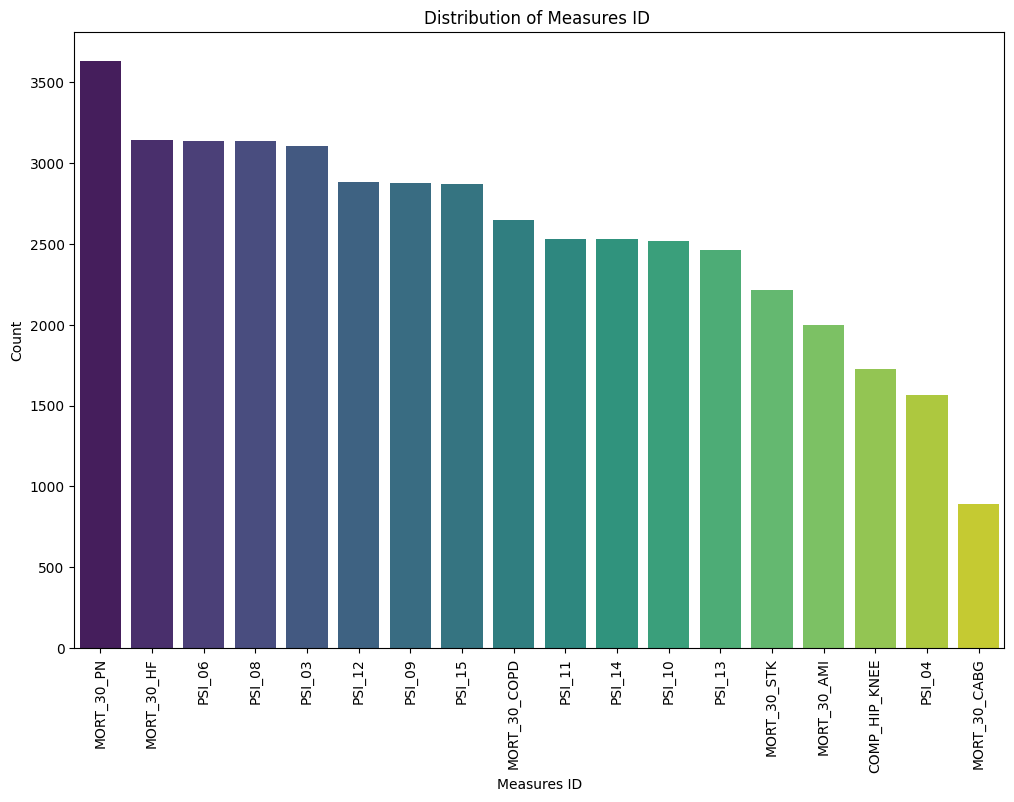

In [19]:
plt.figure(figsize=(12, 8))
brand_counts=df["Measure ID"].value_counts()
sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Measures ID ')
plt.xlabel('Measures ID')
plt.ylabel('Count')
plt.show()

C:\Users\Mua\AppData\Local\Temp\ipykernel_12332\926304118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')


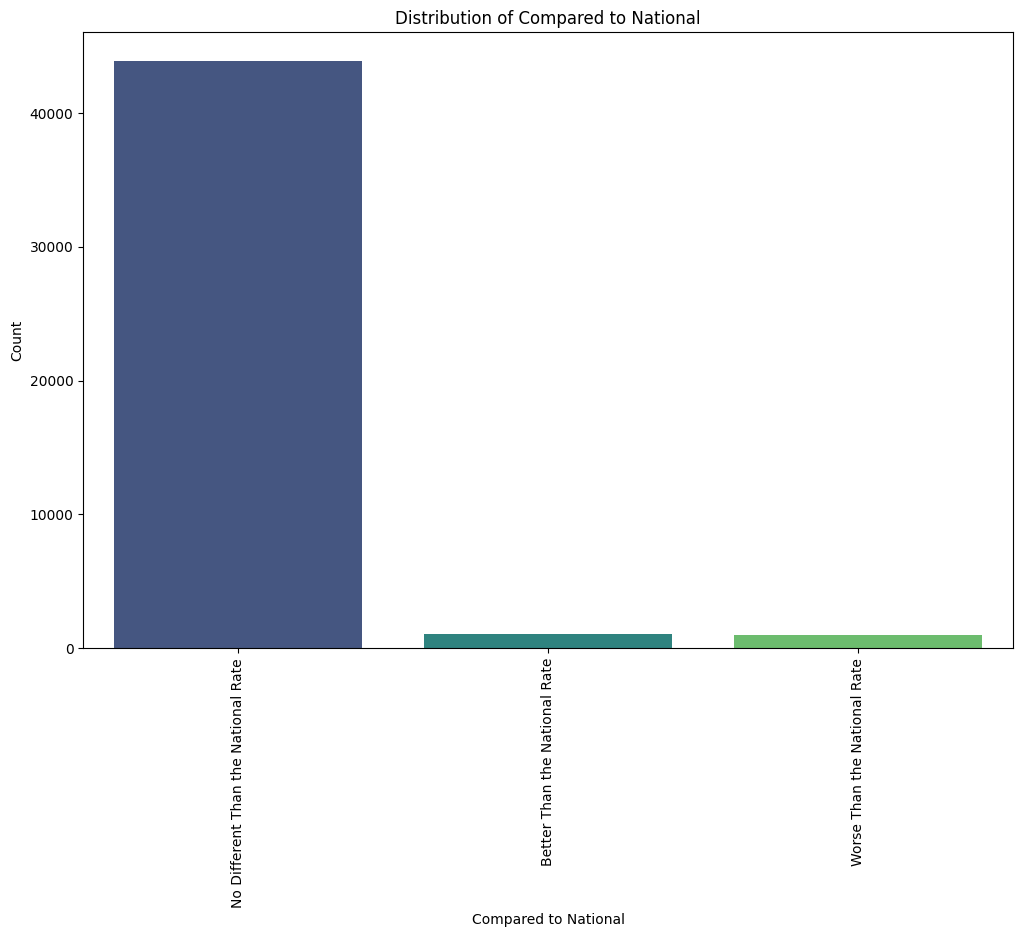

In [16]:

plt.figure(figsize=(12, 8))
brand_counts=df["Compared to National"].value_counts()
sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Compared to National')
plt.xlabel('Compared to National')
plt.ylabel('Count')
plt.show()

C:\Users\Mua\AppData\Local\Temp\ipykernel_12332\1483705272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Compared to National', y='Score',palette='viridis')


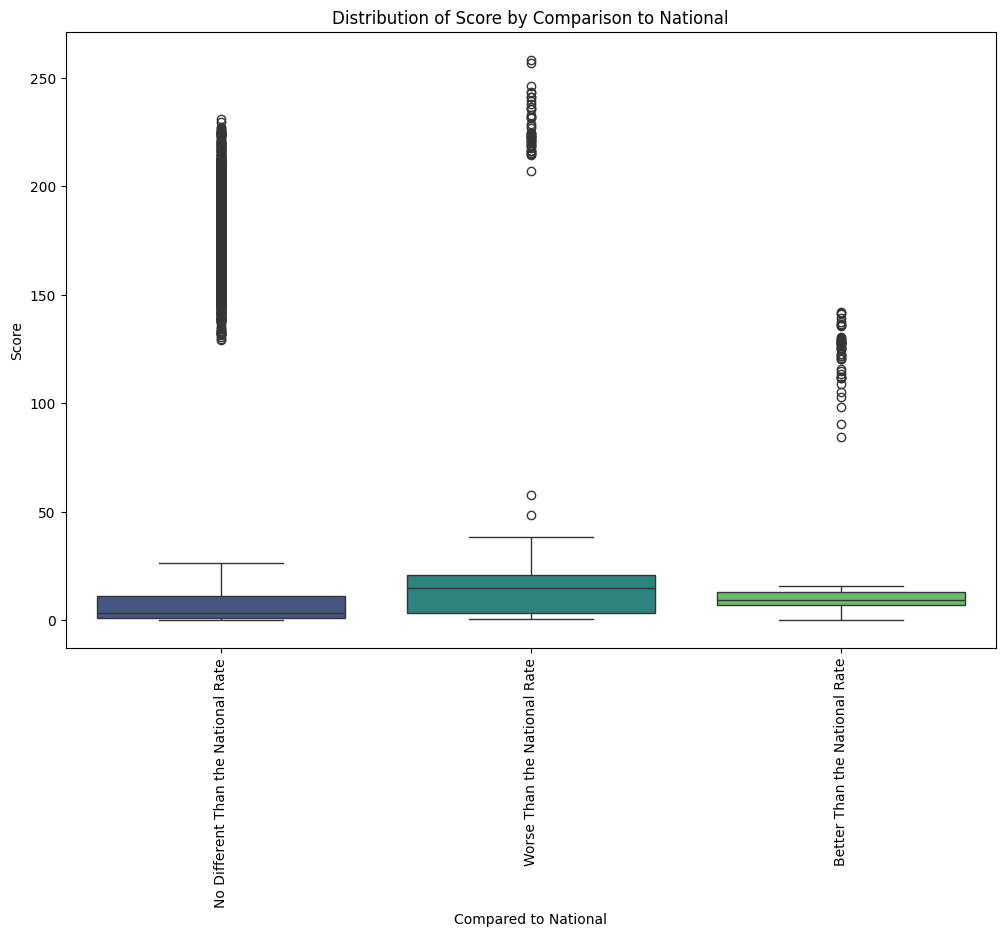

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Compared to National', y='Score',palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Score by Comparison to National')
plt.xlabel('Compared to National')
plt.ylabel('Score')
plt.show()

is not clean to make it clean we will remove the outliear

C:\Users\Mua\AppData\Local\Temp\ipykernel_12332\1903667241.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Compared to National', y='Score', palette='viridis')


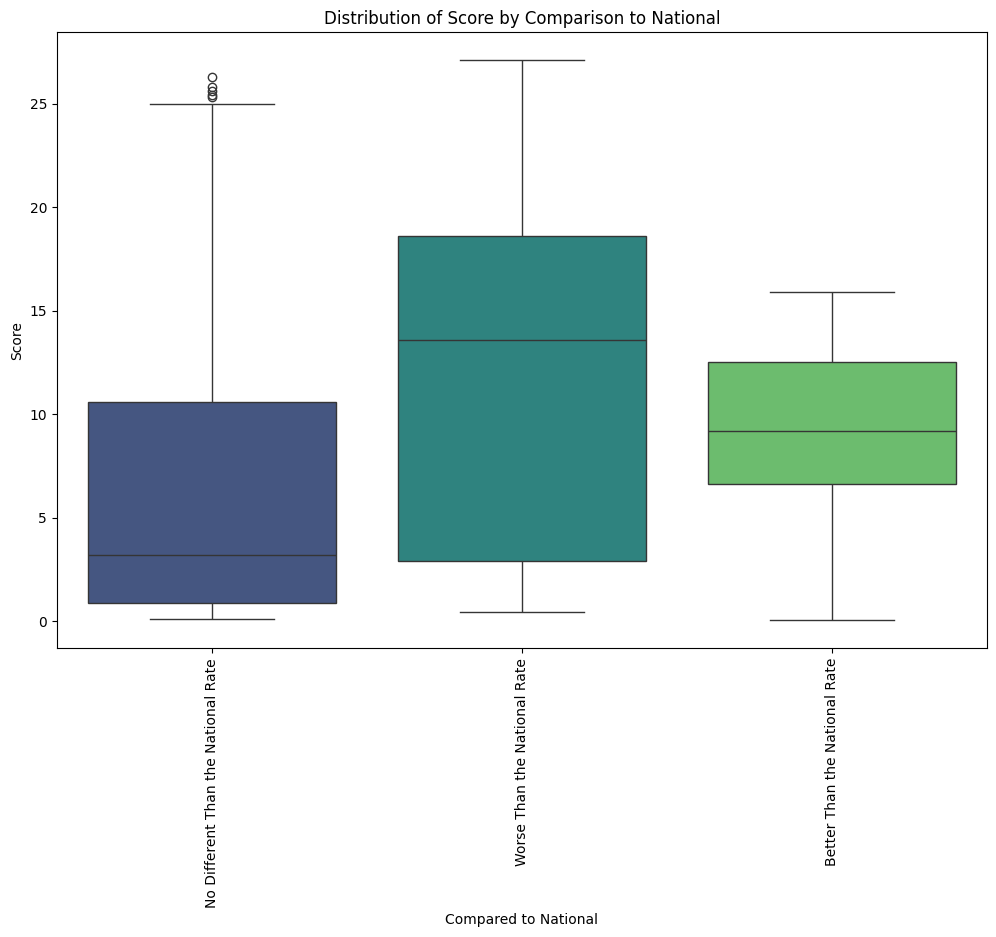

In [21]:
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Score'] >= lower_bound) & (df['Score'] <= upper_bound)]
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='Compared to National', y='Score', palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Score by Comparison to National')
plt.xlabel('Compared to National')
plt.ylabel('Score')
plt.show()


Target Distribution:
Compared to National
No Different Than the National Rate    43852
Better Than the National Rate           1017
Worse Than the National Rate            1010
Name: count, dtype: int64

Target Distribution Normalized:
Compared to National
No Different Than the National Rate    0.955819
Better Than the National Rate          0.022167
Worse Than the National Rate           0.022014
Name: proportion, dtype: float64


C:\Users\Mua\AppData\Local\Temp\ipykernel_12332\319473301.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_present["Compared to National"], palette="viridis")


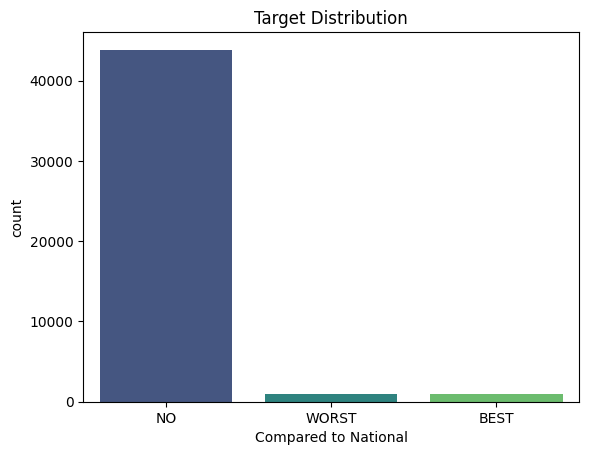

In [22]:
# Is the target imbalanced?
print("Target Distribution:")
distribution = df["Compared to National"].value_counts()
print(distribution)

print("\nTarget Distribution Normalized:")
distribution_normalized = df["Compared to National"].value_counts(normalize=True)
print(distribution_normalized)

# 1. Create a mapping from the old labels to the new labels
mapping = {
    "No Different Than the National Rate": "NO",
    "Better Than the National Rate": "BEST",
    "Worse Than the National Rate": "WORST"
}

# 2. Replace it 
df_present=df.copy()
df_present["Compared to National"] = df_present["Compared to National"].replace(mapping)

# 3. Plot the distribution
sns.countplot(x=df_present["Compared to National"], palette="viridis")
plt.title("Target Distribution")
plt.show()




for this the target imbalanced so we should use appropriate metric (Precision, Recall, F1,etc ), and use appropriate split (StraitifiedKFold, For more info: [link](https://medium.com/@juanc.olamendy/a-comprehensive-guide-to-stratified-k-fold-cross-validation-for-unbalanced-data-014691060f17) )

In [23]:
df.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Start Date,End Date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,32,3.0,1.6,5.5,07/01/2020,03/31/2023
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,291,10.8,8.4,13.6,07/01/2020,06/30/2023
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,157,3.8,2.1,6.8,07/01/2020,06/30/2023
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,122,7.9,5.2,11.9,07/01/2020,06/30/2023
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,610,10.5,8.6,12.9,07/01/2020,06/30/2023


from this we can mearge the first 10 columns by comma separated values it will be like (Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Start Date,End Date)
to make build model more easliy 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45879 entries, 0 to 90578
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Facility ID           45879 non-null  object 
 1   Facility Name         45879 non-null  object 
 2   Address               45879 non-null  object 
 3   City/Town             45879 non-null  object 
 4   State                 45879 non-null  object 
 5   ZIP Code              45879 non-null  int64  
 6   County/Parish         45879 non-null  object 
 7   Telephone Number      45879 non-null  object 
 8   Measure ID            45879 non-null  object 
 9   Measure Name          45879 non-null  object 
 10  Compared to National  45879 non-null  object 
 11  Denominator           45879 non-null  int64  
 12  Score                 45879 non-null  float64
 13  Lower Estimate        45879 non-null  float64
 14  Higher Estimate       45879 non-null  float64
 15  Start Date            45

In [25]:
# change type of ZIP Code to object 
df['ZIP Code'] = df['ZIP Code'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45879 entries, 0 to 90578
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Facility ID           45879 non-null  object 
 1   Facility Name         45879 non-null  object 
 2   Address               45879 non-null  object 
 3   City/Town             45879 non-null  object 
 4   State                 45879 non-null  object 
 5   ZIP Code              45879 non-null  object 
 6   County/Parish         45879 non-null  object 
 7   Telephone Number      45879 non-null  object 
 8   Measure ID            45879 non-null  object 
 9   Measure Name          45879 non-null  object 
 10  Compared to National  45879 non-null  object 
 11  Denominator           45879 non-null  int64  
 12  Score                 45879 non-null  float64
 13  Lower Estimate        45879 non-null  float64
 14  Higher Estimate       45879 non-null  float64
 15  Start Date            45

In [26]:
columns_to_combine = [
    "Facility ID",
    "Facility Name",
    "Address",
    "City/Town",
    "State",
    "ZIP Code",
    "County/Parish",
    "Telephone Number",
    "Start Date",
    "End Date"
]

# Create a single column with comma-separated values
df["Merged_Columns"] = (
    df[columns_to_combine]
    .apply(lambda row: ",".join(row), axis=1)  
)

df.drop(columns=columns_to_combine, inplace=True)

df.head()

,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Merged_Columns
0,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,32,3.0,1.6,5.5,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
1,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,291,10.8,8.4,13.6,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
2,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,157,3.8,2.1,6.8,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
3,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,122,7.9,5.2,11.9,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
4,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,610,10.5,8.6,12.9,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."


In [27]:
# Do we have categorical columns?
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", list(categorical_cols))

Categorical Columns: ['Measure ID', 'Measure Name', 'Compared to National', 'Merged_Columns']


##### We have several categorical columns. Let's encode them using Label Encoder.Note we will not include Merged_Columns because we will not inculde in model 

In [28]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols = [col for col in categorical_cols if col != "Merged_Columns"]

le = LabelEncoder()

for col in categorical_cols:
    print(f"Encoding column: {col}")
    df[col] = le.fit_transform(df[col])
    


Encoding column: Measure ID
Encoding column: Measure Name
Encoding column: Compared to National


In [29]:
df.head()

,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Merged_Columns
0,0,17,1,32,3.0,1.6,5.5,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
1,1,4,1,291,10.8,8.4,13.6,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
2,2,2,1,157,3.8,2.1,6.8,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
3,3,3,1,122,7.9,5.2,11.9,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
4,4,5,1,610,10.5,8.6,12.9,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."


In [30]:
# Do we have different scales in the data?
df.describe()

,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate
count,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000
mean,8.958783,8.743456,0.999847,1183.194228,11.863662,7.863354,16.289141
std,4.949325,4.915939,0.210196,2543.559419,32.039607,23.486271,40.776739
min,0.000000,0.000000,0.000000,25.000000,0.050000,0.000000,0.250000
25%,5.000000,5.000000,1.000000,91.000000,1.060000,0.070000,1.980000
50%,9.000000,9.000000,1.000000,269.000000,3.590000,1.100000,6.130000
75%,13.000000,13.000000,1.000000,968.000000,11.500000,8.100000,16.300000
max,17.000000,17.000000,2.000000,57005.000000,258.280000,220.220000,302.620000


##### Yes, we have different scales.
##### use MinMaxScaler to scale the data.

In [31]:
features = df.columns.drop(["Compared to National",'Merged_Columns'])  ### DON'T SCALE THE TARGET
print("Features:", list(features))

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df

Features: ['Measure ID', 'Measure Name', 'Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']


,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Merged_Columns
0,0.000000,1.000000,1,0.000123,0.011424,0.007265,0.017363,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
1,0.058824,0.235294,1,0.004668,0.041630,0.038144,0.044151,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
2,0.117647,0.117647,1,0.002317,0.014522,0.009536,0.021662,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
3,0.176471,0.176471,1,0.001702,0.030399,0.023613,0.038529,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
4,0.235294,0.294118,1,0.010267,0.040468,0.039052,0.041836,"010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 RO..."
...,...,...,...,...,...,...,...,...
90435,0.823529,0.588235,1,0.000772,0.014483,0.004359,0.021067,"670309,TEXAS HEALTH HOSPITAL MANSFIELD,2300 LO..."
90436,0.882353,0.823529,1,0.000053,0.020912,0.005222,0.031418,"670309,TEXAS HEALTH HOSPITAL MANSFIELD,2300 LO..."
90438,1.000000,0.000000,1,0.000649,0.004144,0.000863,0.005986,"670309,TEXAS HEALTH HOSPITAL MANSFIELD,2300 LO..."
90573,0.000000,1.000000,1,0.000614,0.012198,0.007720,0.018355,"671300,GRAHAM REGIONAL MEDICAL CENTER,1301 MON..."


In [32]:
df["Compared to National"].value_counts()

Compared to National
1    43852
0     1017
2     1010
Name: count, dtype: int64

#  Training our Classification Models

> We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case, theCompared to National column.

In [33]:
X=df.drop(["Compared to National",'Merged_Columns'],axis=1)
y=df["Compared to National"]

In [34]:
model=LogisticRegression()
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

accuracy_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    print("Accuracy Scores:", accuracy_scores)
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))

Accuracy Scores: [0.9558631211857018]
Accuracy Scores: [0.9558631211857018, 0.9557541412380122]
Accuracy Scores: [0.9558631211857018, 0.9557541412380122, 0.9557541412380122]
Accuracy Scores: [0.9558631211857018, 0.9557541412380122, 0.9557541412380122, 0.9557541412380122]
Accuracy Scores: [0.9558631211857018, 0.9557541412380122, 0.9557541412380122, 0.9557541412380122, 0.9557493188010899]
Average Accuracy: 0.9557749727401657


In [35]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
import numpy as np

model = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


for fold_idx, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold {fold_idx} Metrics:")
    print(f"  Accuracy:  {acc:.3f}")
    print(f"  Precision: {prec:.3f}")
    print(f"  Recall:    {rec:.3f}")
    print(f"  F1-score:  {f1:.3f}")
    print(f"  Confusion Matrix:\n{cm}\n")

print("Average Metrics Across Folds:")
print(f"  Accuracy:  {np.mean(accuracy_scores):.3f}")
print(f"  Precision: {np.mean(precision_scores):.3f}")
print(f"  Recall:    {np.mean(recall_scores):.3f}")
print(f"  F1-score:  {np.mean(f1_scores):.3f}")


c:\Users\Mua\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mua\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1 Metrics:
  Accuracy:  0.956
  Precision: 0.485
  Recall:    0.335
  F1-score:  0.329
  Confusion Matrix:
[[   0  203    0]
 [   0 8770    1]
 [   0  201    1]]

Fold 2 Metrics:
  Accuracy:  0.956
  Precision: 0.319
  Recall:    0.333
  F1-score:  0.326
  Confusion Matrix:
[[   0  203    0]
 [   1 8770    0]
 [   0  202    0]]



c:\Users\Mua\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mua\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 3 Metrics:
  Accuracy:  0.956
  Precision: 0.319
  Recall:    0.333
  F1-score:  0.326
  Confusion Matrix:
[[   0  204    0]
 [   0 8770    0]
 [   0  202    0]]

Fold 4 Metrics:
  Accuracy:  0.956
  Precision: 0.319
  Recall:    0.333
  F1-score:  0.326
  Confusion Matrix:
[[   0  204    0]
 [   0 8770    0]
 [   0  202    0]]

Fold 5 Metrics:
  Accuracy:  0.956
  Precision: 0.319
  Recall:    0.333
  F1-score:  0.326
  Confusion Matrix:
[[   0  203    0]
 [   0 8769    1]
 [   0  202    0]]

Average Metrics Across Folds:
  Accuracy:  0.956
  Precision: 0.352
  Recall:    0.334
  F1-score:  0.326


c:\Users\Mua\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Observations:

Accuracy 95 to 96% (dominated by the majority class).
Very low precision/recall for minority classes.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Logistic Regression with class_weight
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 162   18   23]
 [2670 4612 1489]
 [  84   45   73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.80      0.10       203
           1       0.99      0.53      0.69      8771
           2       0.05      0.36      0.08       202

    accuracy                           0.53      9176
   macro avg       0.36      0.56      0.29      9176
weighted avg       0.95      0.53      0.66      9176



You saw that it increased recall for minority classes but drastically reduced overall accuracy.



# 1.3 Evaluation

The model’s results demonstrate the inherent challenge of classifying rare outcomes in a highly imbalanced dataset. While overall accuracy hovers around 53%—much lower than the naive 95% from always predicting “No Different”—the drop indicates the model is actively attempting to identify minority classes (“Better” and “Worse”). Macro precision, recall, and F1 scores reveal that while the model increases recall for minority classes, it struggles with precision, leading to numerous false positives. In the confusion matrix, the trade-off is apparent: class-weighting helps identify more “Better” and “Worse” cases at the cost of reduced accuracy and more misclassifications. Ultimately, this model shows progress in capturing minority classes.








# 1.4 Deployment (Imagined Scenario)

Finally, CRISP-DM suggests we deploy  Let’s imagine a new facility with certain measure data. We’ll create a single sample and see how the model predicts.



In [54]:
# Example new facility (encoded feature values)
# Suppose 'Measure ID'=0.8, 'Measure Name'=0.9, 'Denominator'=0.5, 
# 'Score'=0.2, 'Lower Estimate'=0.2, 'Higher Estimate'=0.5 
# (scaled values, just as an example)
new_sample = pd.DataFrame({
    'Measure ID': [0.8],
    'Measure Name': [0.9],
    'Denominator': [0.5],
    'Score': [0.2],
    'Lower Estimate': [0.2],
    'Higher Estimate': [0.5]
})

# Use your final model (e.g., the SMOTE-trained logistic regression)
pred = model.predict(new_sample)
print("Predicted class:", pred[0])

# If you need to invert the label encoding for "Compared to National":
# label_map = {0: "No Different", 1: "Better", 2: "Worse"}  # Example

Predicted class: 1
